**1. Seleksi Unvariate**

Metode paling sederhana dan tercepat didasarkan pada uji statistik univariat. Untuk setiap fitur, ukur seberapa kuat target bergantung pada fitur menggunakan uji statistik seperti χ2 (chi-square) or ANOVA.

Uji statistik dapat digunakan untuk memilih fitur-fitur tersebut yang memiliki relasi paling kuat dengan variabel output/target. Library scikit-learn menyediakan class SelectKBest yang digunakan untuk serangkaian uji statistik berbeda untuk memilih angka spesifik dari fitur.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [30]:
data = pd.read_csv("/content/conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv")
data

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,NaN,NaN,2
269,269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,NaN,NaN,2
270,270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,NaN,NaN,2
271,271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,NaN,NaN,2


In [34]:
data['Initial_EDSS'].fillna(0, inplace=True) #mengubah data nilai Nan menjadi 0
data['Final_EDSS'].fillna(0, inplace=True) #mengubah data nilai Nan menjadi 0
data

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,0.0,0.0,2
269,269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,0.0,0.0,2
270,270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,0.0,0.0,2
271,271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,0.0,0.0,2


In [43]:
x = data.iloc[:, 0:]
y = data.iloc[:,2]
x = x.dropna() #mengeluarkan data yang bernilai NaN
y = y.drop(y.index[-2:], axis=0) #menghapus data yang inkonsisten

In [45]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [47]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

                 Specs        Score
0           Unnamed: 0  2008.742826
2                  Age   676.162456
6      Initial_Symptom   161.247710
12                BAEP    81.395181
3            Schooling    72.256603
18          Final_EDSS    64.451386
17        Initial_EDSS    53.906447
11                 VEP    49.597979
15  Infratentorial_MRI    41.062239
9               LLSSEP    33.521313


2. Feature Importance

Feature importance mengacu pada kelas teknik untuk menetapkan skor ke fitur input ke model prediktif yang menunjukkan importance relatif dari setiap fitur saat membuat prediksi. Skor Feature importance dapat dihitung untuk masalah yang melibatkan prediksi nilai numerik, yang disebut regresi, dan masalah yang melibatkan prediksi label kelas, yang disebut klasifikasi.

Skor digunakan dalam berbagai situasi dalam masalah pemodelan prediktif, seperti:

Lebih memahami data.
Lebih memahami model.
Mengurangi jumlah fitur input.
memberi skor untuk setiap fitur data, semakin tinggi skor semakin penting atau relevan fitur tersebut terhadap variabel output
Inbuilt yang dilengkapi dengan Pengklasifikasi Berbasis Pohon (Tree Based Classifier), kami akan menggunakan Pengklasifikasi Pohon Ekstra untuk mengekstraksi 10 fitur teratas untuk kumpulan data

In [48]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [49]:
data = pd.read_csv("/content/conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv")

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,NaN,NaN,2
269,269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,NaN,NaN,2
270,270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,NaN,NaN,2
271,271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,NaN,NaN,2


In [59]:
x = data.iloc[:, 1:]
y = data.iloc[:,2]

In [60]:
corrmat = data.corr()
top_corr_features = corrmat.index

**3. Matriks Korelasi dengan Heatmap (lanjutan)**

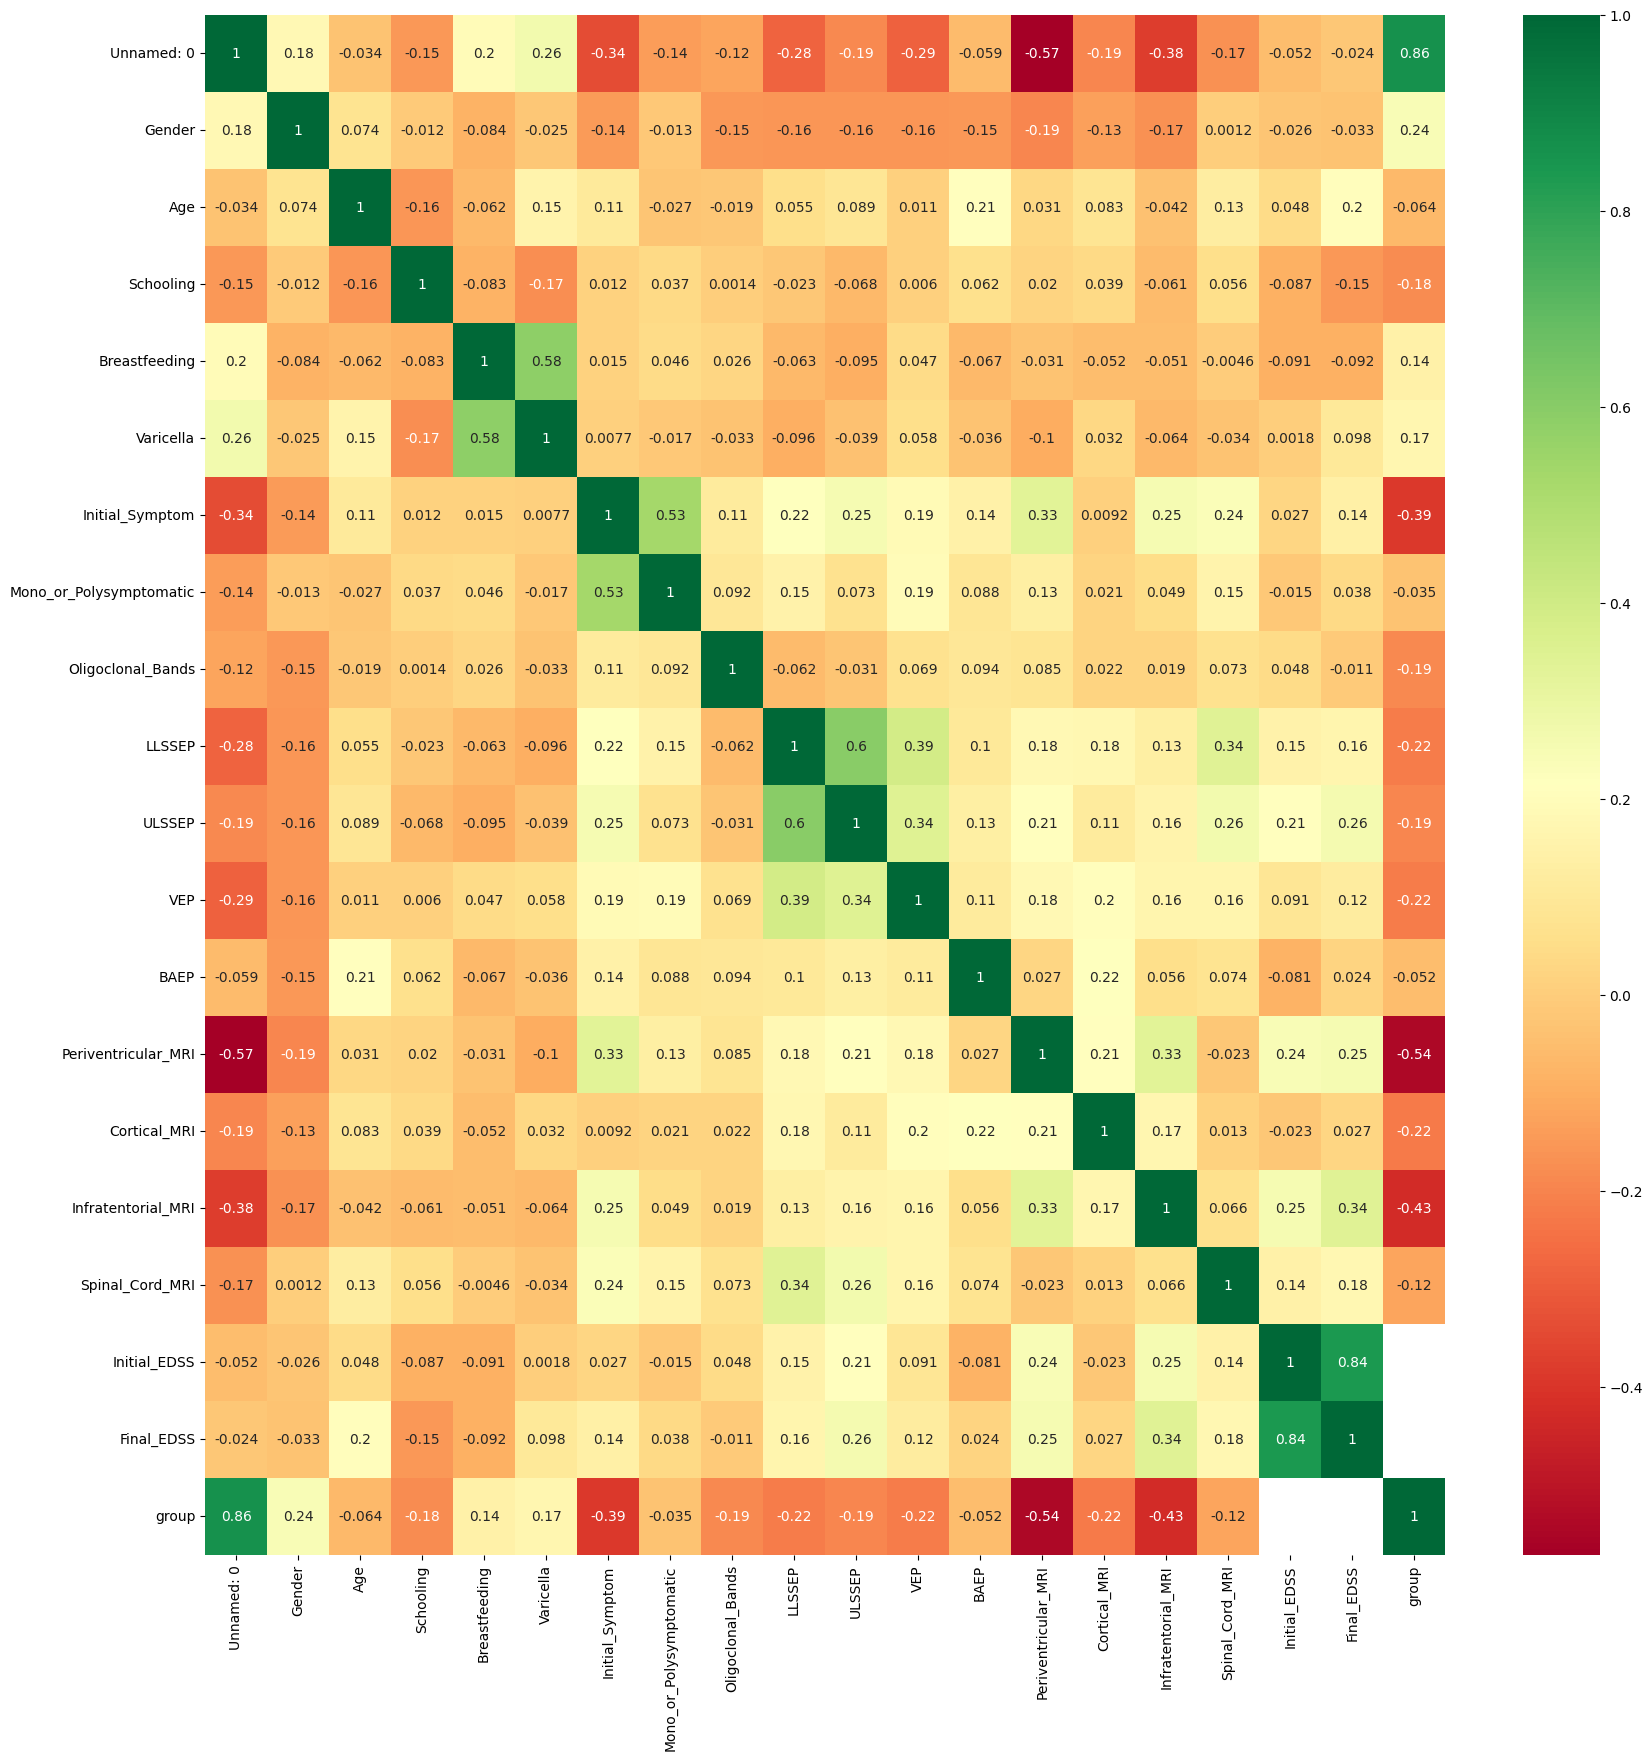

In [61]:
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")